In [1]:
import pandas as pd

In [12]:
df = pd.read_csv("credit_card_transactions.csv")

In [13]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,is_fraud,merch_zipcode,year,month,day,hour,age,day_of_week,prev_trans_time,time_diff_min
1017,1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,...,0,NaN,2019,1,1,12,33,Tuesday,NaT,NaN
2724,2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,...,0,NaN,2019,1,2,8,33,Wednesday,2019-01-01 12:47:15,1197.700000
2726,2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,...,0,NaN,2019,1,2,8,33,Wednesday,2019-01-02 08:44:57,2.650000
2882,2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,...,0,NaN,2019,1,2,12,33,Wednesday,2019-01-02 08:47:36,230.633333
2907,2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,...,0,82649.0,2019,1,2,13,33,Wednesday,2019-01-02 12:38:14,32.533333


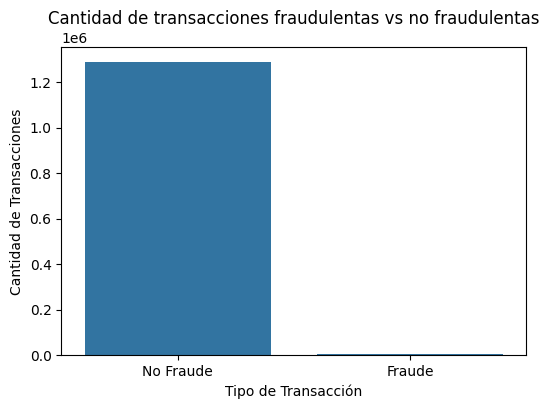

Conclusión: Hay un claro desbalance entre transacciones legítimas y fraudulentas. La mayoría son legítimas, mientras que las fraudulentas representan un porcentaje pequeño.


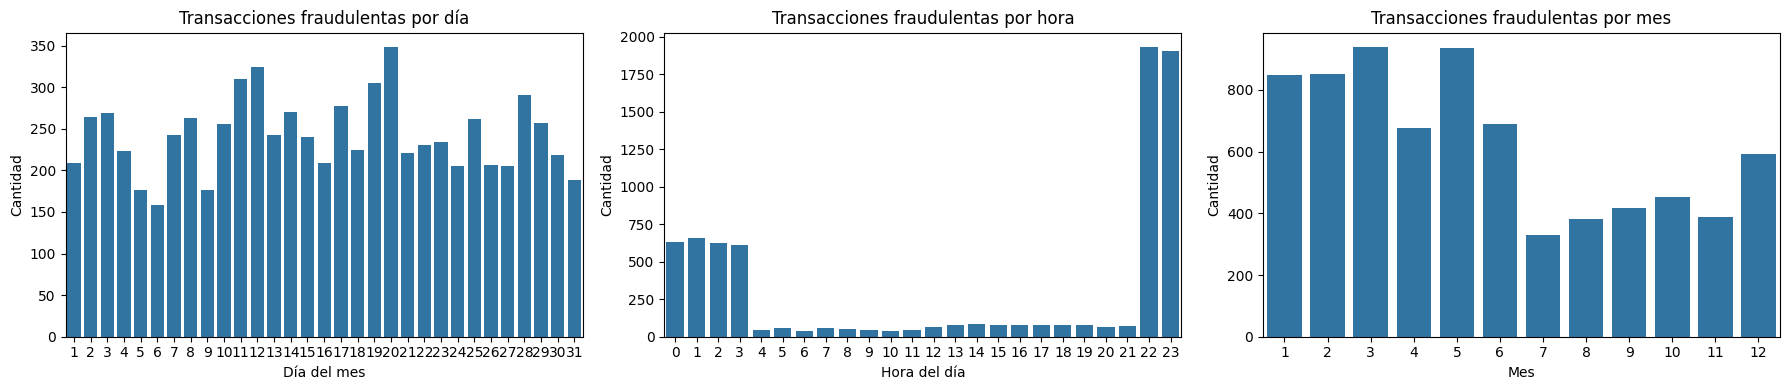

Conclusión: Las transacciones fraudulentas ocurren en todos los días y meses, con picos en ciertas horas, típicamente en la noche y tarde, posiblemente cuando hay menor vigilancia.


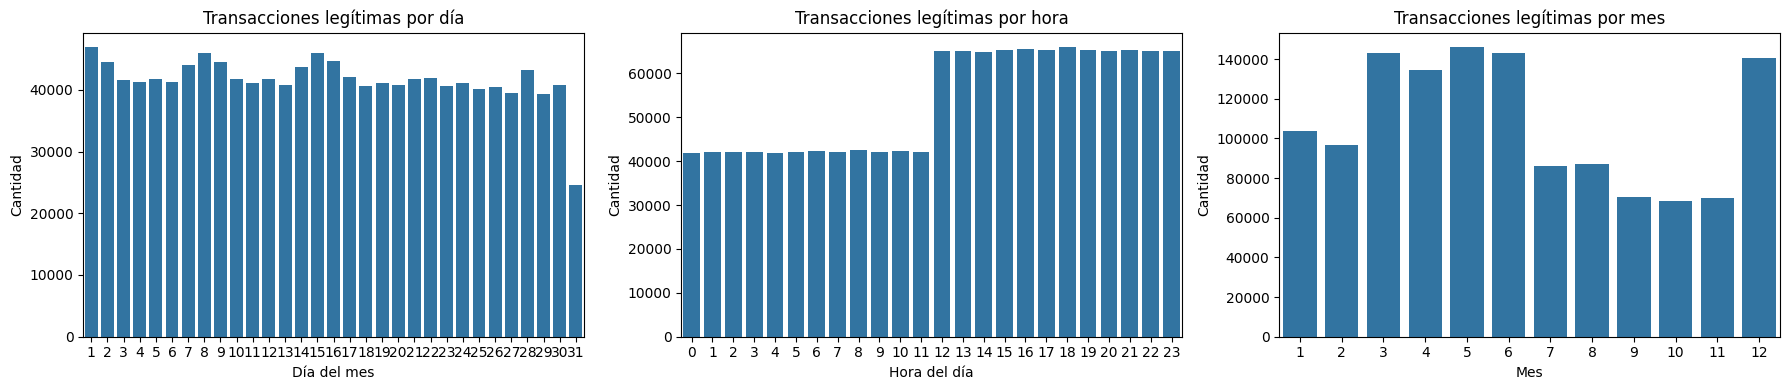

Conclusión: Las transacciones legítimas muestran un patrón similar en distribución diaria y mensual, con mayor actividad en horas laborales del día.


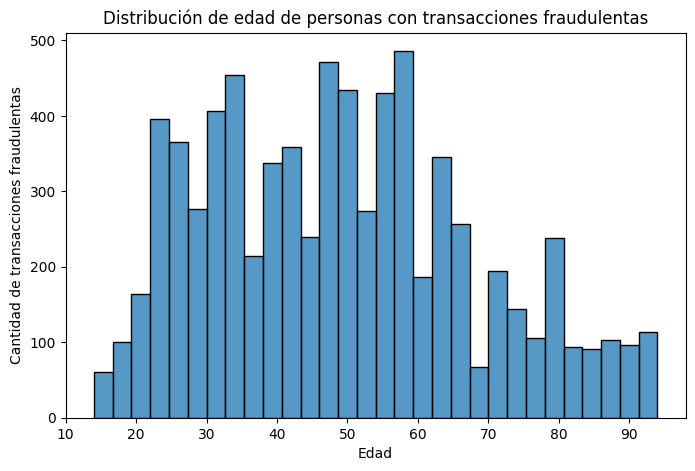

Conclusión: Las transacciones fraudulentas afectan a personas en diferentes rangos de edad, con mayor concentración en adultos jóvenes y de mediana edad.


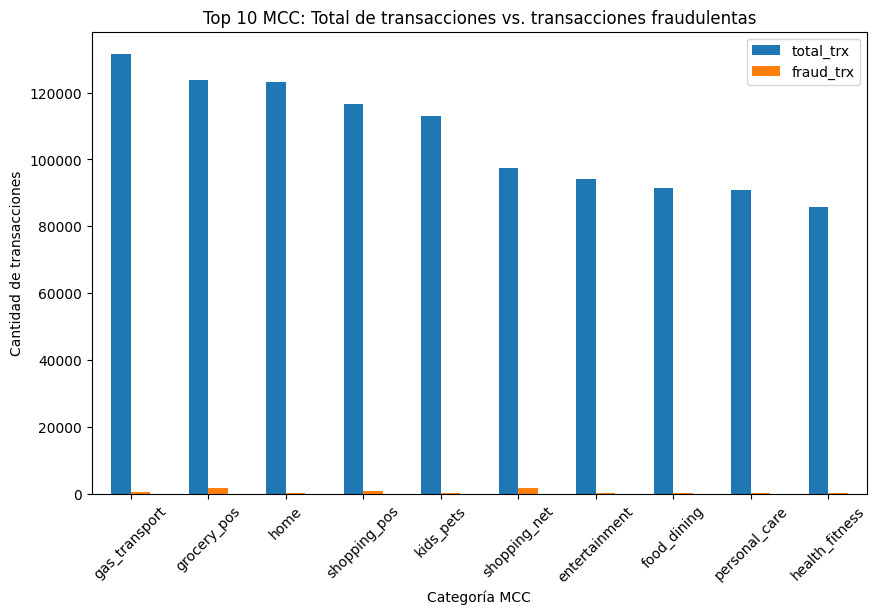

Conclusión: Las categorías con más transacciones no siempre coinciden con las que tienen mayor número de fraudes, lo que puede indicar que ciertos tipos de comercio son más susceptibles al fraude.


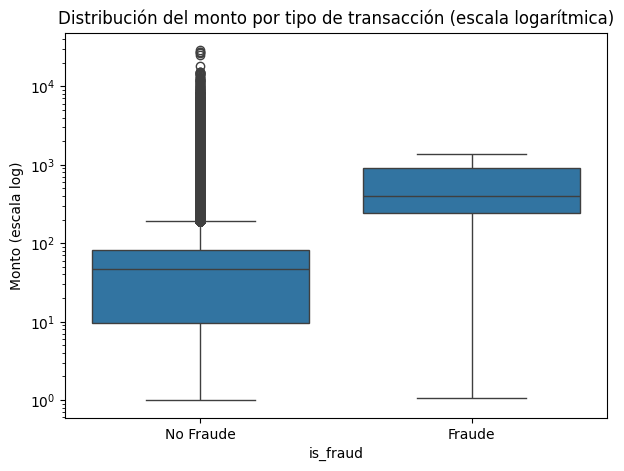

Conclusión: Las transacciones fraudulentas tienden a tener montos más altos, pero hay una gran variabilidad. La escala logarítmica ayuda a visualizar la dispersión.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que el dataframe ya está cargado en df
# df = pd.read_csv('credit_card_transactions.csv')

# Convertir fecha a datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Crear columnas auxiliares de tiempo
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour

# Calcular edad en el momento de la transacción
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df.loc[df['age'] < 0, 'age'] = 0  # corregir edades negativas si las hay

### 1. Cantidad de elementos con fraude y no fraude
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='is_fraud')
plt.title('Cantidad de transacciones fraudulentas vs no fraudulentas')
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.xlabel('Tipo de Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.show()

print("Conclusión: Hay un claro desbalance entre transacciones legítimas y fraudulentas. La mayoría son legítimas, mientras que las fraudulentas representan un porcentaje pequeño.")

### 2. Cantidad de transacciones fraudulentas por día, hora y mes

fig, axs = plt.subplots(1, 3, figsize=(18,4))

fraud = df[df['is_fraud'] == 1]

sns.countplot(x='day', data=fraud, ax=axs[0])
axs[0].set_title('Transacciones fraudulentas por día')
axs[0].set_xlabel('Día del mes')
axs[0].set_ylabel('Cantidad')

sns.countplot(x='hour', data=fraud, ax=axs[1])
axs[1].set_title('Transacciones fraudulentas por hora')
axs[1].set_xlabel('Hora del día')
axs[1].set_ylabel('Cantidad')

sns.countplot(x='month', data=fraud, ax=axs[2])
axs[2].set_title('Transacciones fraudulentas por mes')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

print("Conclusión: Las transacciones fraudulentas ocurren en todos los días y meses, con picos en ciertas horas, típicamente en la noche y tarde, posiblemente cuando hay menor vigilancia.")

### 3. Cantidad de transacciones no fraudulentas por día, hora y mes

fig, axs = plt.subplots(1, 3, figsize=(18,4))

no_fraud = df[df['is_fraud'] == 0]

sns.countplot(x='day', data=no_fraud, ax=axs[0])
axs[0].set_title('Transacciones legítimas por día')
axs[0].set_xlabel('Día del mes')
axs[0].set_ylabel('Cantidad')

sns.countplot(x='hour', data=no_fraud, ax=axs[1])
axs[1].set_title('Transacciones legítimas por hora')
axs[1].set_xlabel('Hora del día')
axs[1].set_ylabel('Cantidad')

sns.countplot(x='month', data=no_fraud, ax=axs[2])
axs[2].set_title('Transacciones legítimas por mes')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

print("Conclusión: Las transacciones legítimas muestran un patrón similar en distribución diaria y mensual, con mayor actividad en horas laborales del día.")

### 4. Histograma de edades de personas que han sufrido fraude

plt.figure(figsize=(8,5))
sns.histplot(fraud['age'], bins=30, kde=False)
plt.title('Distribución de edad de personas con transacciones fraudulentas')
plt.xlabel('Edad')
plt.ylabel('Cantidad de transacciones fraudulentas')
plt.show()

print("Conclusión: Las transacciones fraudulentas afectan a personas en diferentes rangos de edad, con mayor concentración en adultos jóvenes y de mediana edad.")

### 5. MCC con más transacciones vs MCC con mayor cantidad de fraude

# "category" es MCC, cantidad de transacciones y cantidad de fraude por categoría
mcc_counts = df['category'].value_counts()
mcc_fraud_counts = df[df['is_fraud'] == 1]['category'].value_counts()

mcc_df = pd.DataFrame({
    'total_trx': mcc_counts,
    'fraud_trx': mcc_fraud_counts
}).fillna(0).sort_values(by='total_trx', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10,6))
mcc_df.plot(kind='bar', ax=ax)
ax.set_title('Top 10 MCC: Total de transacciones vs. transacciones fraudulentas')
ax.set_xlabel('Categoría MCC')
ax.set_ylabel('Cantidad de transacciones')
plt.xticks(rotation=45)
plt.show()

print("Conclusión: Las categorías con más transacciones no siempre coinciden con las que tienen mayor número de fraudes, lo que puede indicar que ciertos tipos de comercio son más susceptibles al fraude.")

### 6. Insight adicional: Monto promedio por tipo de transacción (fraude vs no fraude)

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='is_fraud', y='amt')
plt.yscale('log')
plt.title('Distribución del monto por tipo de transacción (escala logarítmica)')
plt.xticks([0,1], ['No Fraude', 'Fraude'])
plt.ylabel('Monto (escala log)')
plt.show()

print("Conclusión: Las transacciones fraudulentas tienden a tener montos más altos, pero hay una gran variabilidad. La escala logarítmica ayuda a visualizar la dispersión.")



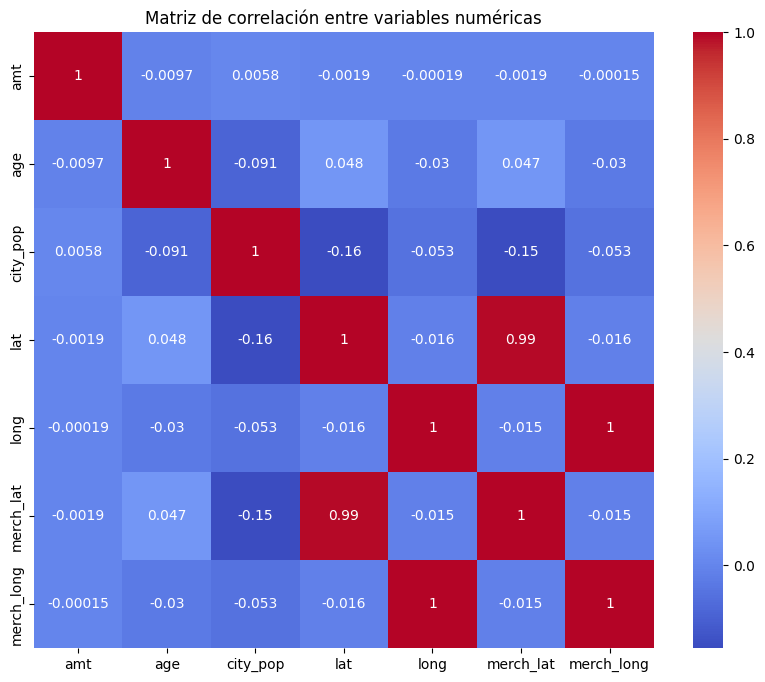

Conclusión: Se identifican relaciones moderadas entre variables que podrían ayudar a modelar, por ejemplo, entre latitud y longitud, o monto y población de la ciudad.


C:\Users\billy\AppData\Local\Temp\ipykernel_39192\1090119001.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 1000)


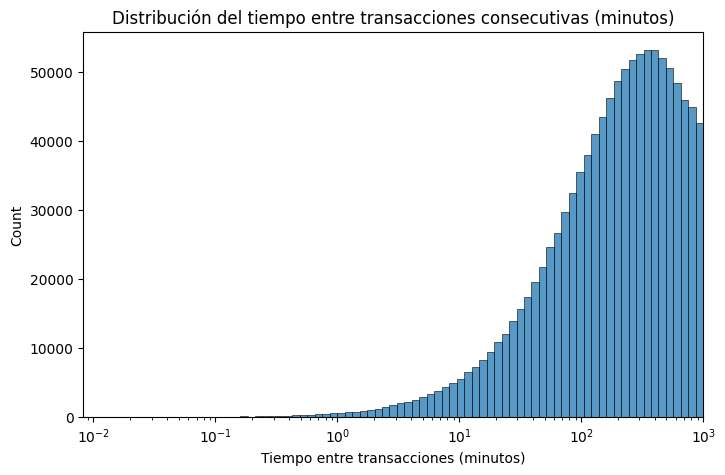

Conclusión: La mayoría de transacciones consecutivas están separadas por minutos u horas, pero algunos casos muestran diferencias muy cortas que podrían indicar fraude.


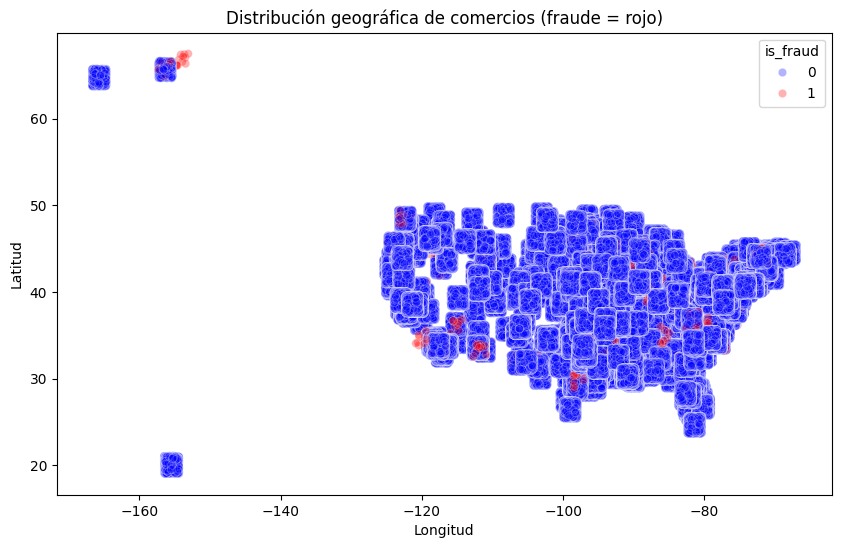

Conclusión: Los fraudes están dispersos geográficamente, sin una concentración clara, aunque algunos clusters podrían explorarse con mapas más detallados.


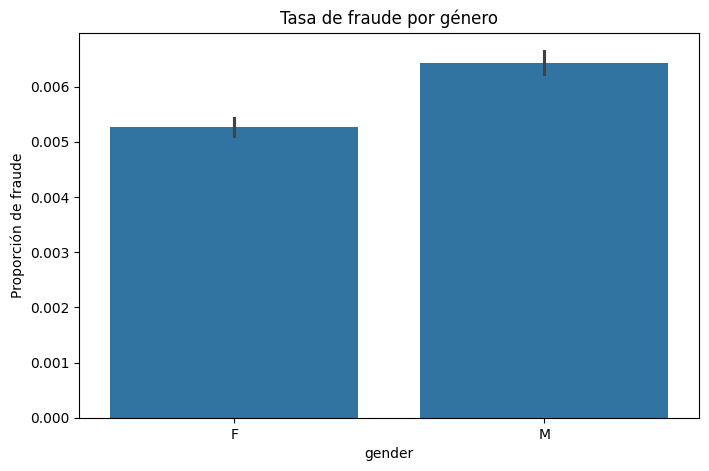

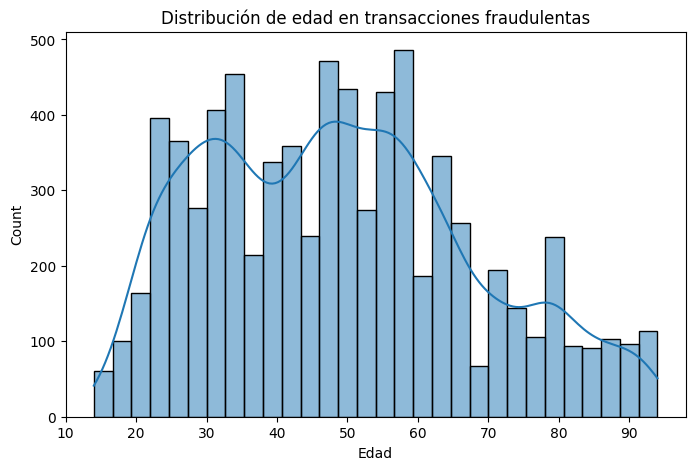

Conclusión: La tasa de fraude es ligeramente mayor en ciertos géneros y afecta principalmente a adultos jóvenes y de mediana edad.


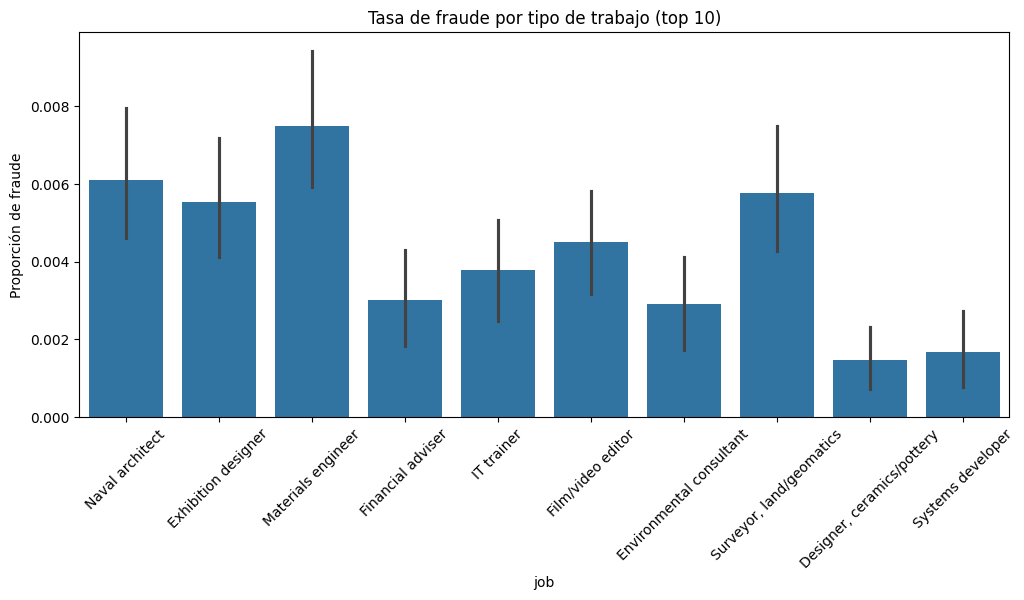

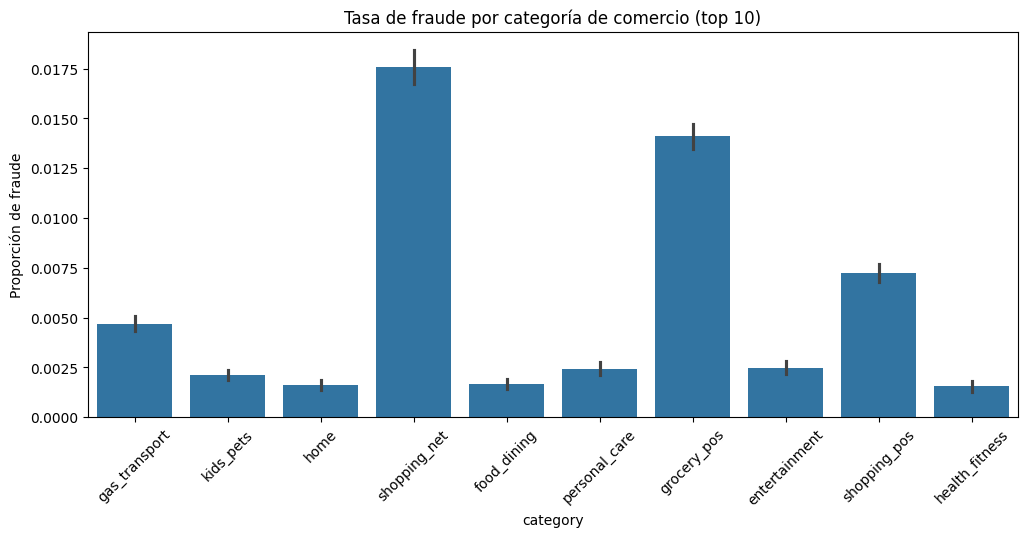

Conclusión: Algunos trabajos y categorías comerciales presentan tasas de fraude más altas, lo que puede ayudar a focalizar controles.


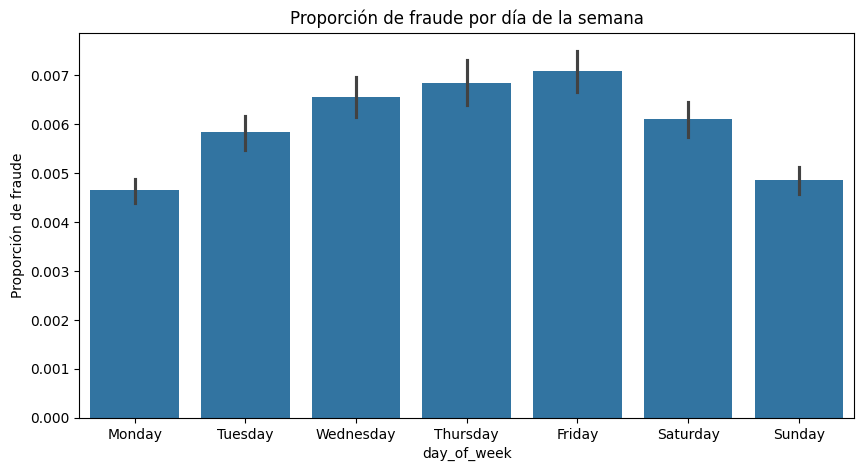

Conclusión: Hay ligeras variaciones en la tasa de fraude según el día, con picos en días específicos que podrían relacionarse con patrones de actividad.


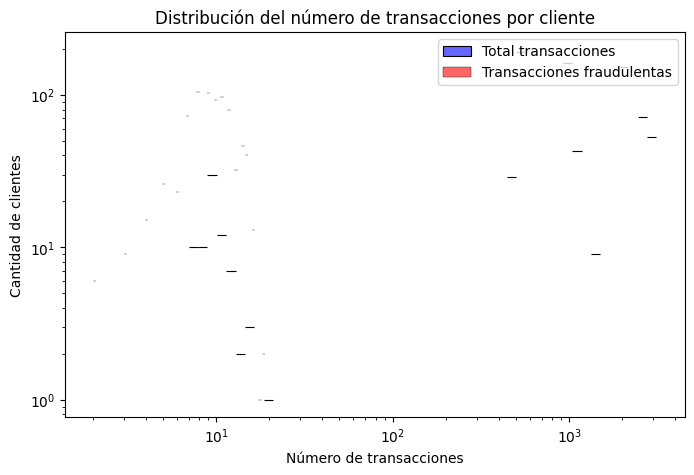

Conclusión: La mayoría de clientes tienen pocas transacciones, pero algunos con mayor número de transacciones tienen también fraude asociado.


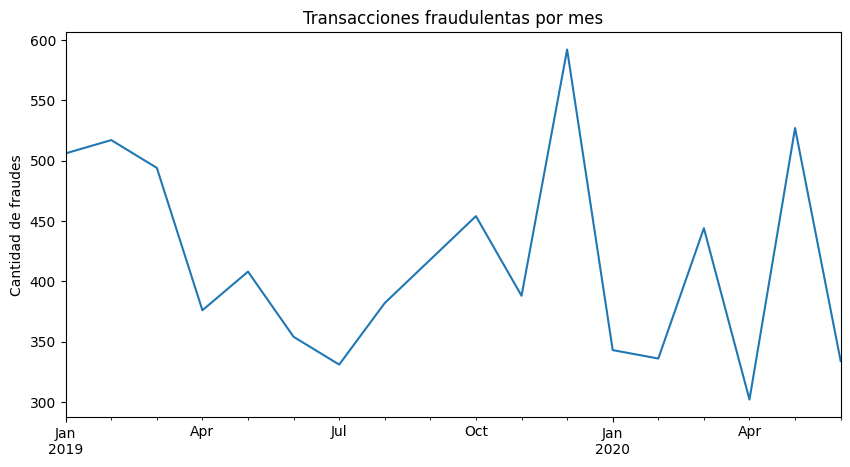

Conclusión: Se observan fluctuaciones mensuales en fraudes, que pueden indicar estacionalidad o eventos puntuales.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse que las fechas están en formato datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Variables auxiliares
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year
df.loc[df['age'] < 0, 'age'] = 0
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()

# 1. Matriz de correlación entre variables numéricas
plt.figure(figsize=(10,8))
num_cols = ['amt', 'age', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()
print("Conclusión: Se identifican relaciones moderadas entre variables que podrían ayudar a modelar, por ejemplo, entre latitud y longitud, o monto y población de la ciudad.")

# 2. Tiempo entre transacciones consecutivas por usuario
df = df.sort_values(['cc_num', 'trans_date_trans_time'])
df['prev_trans_time'] = df.groupby('cc_num')['trans_date_trans_time'].shift(1)
df['time_diff_min'] = (df['trans_date_trans_time'] - df['prev_trans_time']).dt.total_seconds() / 60

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='time_diff_min', bins=100, log_scale=(True,False))
plt.title('Distribución del tiempo entre transacciones consecutivas (minutos)')
plt.xlim(0, 1000)
plt.xlabel('Tiempo entre transacciones (minutos)')
plt.show()
print("Conclusión: La mayoría de transacciones consecutivas están separadas por minutos u horas, pero algunos casos muestran diferencias muy cortas que podrían indicar fraude.")

# 3. Distribución geográfica del fraude (scatter plot lat-long)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='merch_long', y='merch_lat', hue='is_fraud', alpha=0.3, palette={0:'blue',1:'red'})
plt.title('Distribución geográfica de comercios (fraude = rojo)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()
print("Conclusión: Los fraudes están dispersos geográficamente, sin una concentración clara, aunque algunos clusters podrían explorarse con mapas más detallados.")

# 4. Tasa de fraude por género y edad
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='gender', y='is_fraud', estimator=lambda x: sum(x)/len(x))
plt.title('Tasa de fraude por género')
plt.ylabel('Proporción de fraude')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data=df[df['is_fraud']==1], x='age', bins=30, kde=True)
plt.title('Distribución de edad en transacciones fraudulentas')
plt.xlabel('Edad')
plt.show()
print("Conclusión: La tasa de fraude es ligeramente mayor en ciertos géneros y afecta principalmente a adultos jóvenes y de mediana edad.")

# 5. Fraude por tipo de trabajo y categoría
plt.figure(figsize=(12,5))
top_jobs = df['job'].value_counts().head(10).index
sns.barplot(data=df[df['job'].isin(top_jobs)], x='job', y='is_fraud', estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title('Tasa de fraude por tipo de trabajo (top 10)')
plt.ylabel('Proporción de fraude')
plt.show()

plt.figure(figsize=(12,5))
top_cats = df['category'].value_counts().head(10).index
sns.barplot(data=df[df['category'].isin(top_cats)], x='category', y='is_fraud', estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=45)
plt.title('Tasa de fraude por categoría de comercio (top 10)')
plt.ylabel('Proporción de fraude')
plt.show()
print("Conclusión: Algunos trabajos y categorías comerciales presentan tasas de fraude más altas, lo que puede ayudar a focalizar controles.")

# 6. Montos y fraude por día de la semana
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='day_of_week', y='is_fraud', estimator=lambda x: sum(x)/len(x), order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Proporción de fraude por día de la semana')
plt.ylabel('Proporción de fraude')
plt.show()
print("Conclusión: Hay ligeras variaciones en la tasa de fraude según el día, con picos en días específicos que podrían relacionarse con patrones de actividad.")

# 7. Número de transacciones por cliente y comparación fraude/no fraude
trx_counts = df.groupby('cc_num').size()
fraud_trx_counts = df[df['is_fraud'] == 1].groupby('cc_num').size()

plt.figure(figsize=(8,5))
sns.histplot(trx_counts, bins=50, log_scale=(True,True), label='Total transacciones', color='blue', alpha=0.6)
sns.histplot(fraud_trx_counts, bins=50, log_scale=(True,True), label='Transacciones fraudulentas', color='red', alpha=0.6)
plt.legend()
plt.title('Distribución del número de transacciones por cliente')
plt.xlabel('Número de transacciones')
plt.ylabel('Cantidad de clientes')
plt.show()
print("Conclusión: La mayoría de clientes tienen pocas transacciones, pero algunos con mayor número de transacciones tienen también fraude asociado.")

# 8. Series temporales de fraudes agregados por mes
fraud_monthly = df[df['is_fraud']==1].groupby(['year','month']).size()
fraud_monthly.index = pd.to_datetime(fraud_monthly.index.map(lambda x: f"{x[0]}-{x[1]}-01"))

plt.figure(figsize=(10,5))
fraud_monthly.plot()
plt.title('Transacciones fraudulentas por mes')
plt.ylabel('Cantidad de fraudes')
plt.show()
print("Conclusión: Se observan fluctuaciones mensuales en fraudes, que pueden indicar estacionalidad o eventos puntuales.")



In [7]:
df['is_fraud'].value_counts()


is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [14]:
# Eliminar columnas no útiles para predicción
df = df.drop(['Unnamed: 0', 'first', 'last', 'gender', 'street', 'job', 'dob', 
              'trans_num', 'zip', 'unix_time', 'merch_zipcode'], axis=1)

# Convertir columna objetivo a categórica
df['is_fraud'] = df['is_fraud'].astype(int)

# Convertir fecha a datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Crear nuevas variables
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month

# Eliminar fecha original si no será usada
df = df.drop(['trans_date_trans_time'], axis=1)


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

# =============================
# 1. Cargar y explorar los datos
# =============================
df = pd.read_csv("credit_card_transactions.csv")

# Revisamos columnas y valores nulos
print(df.info())
print(df.isnull().sum())

# =============================
# 2. Preprocesamiento de datos
# =============================

# Eliminamos columnas irrelevantes para el modelo
df = df.drop(columns=['Unnamed: 0', 'first', 'last', 'street', 'zip', 'dob', 'trans_num'])

# Codificamos 'gender' y 'category'
df['gender'] = df['gender'].map({'F': 0, 'M': 1})
df['category'] = LabelEncoder().fit_transform(df['category'])

# Creamos nuevas variables de tiempo
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month

# =============================
# 3. Vectorización TF-IDF para columnas de texto
# =============================
# merchant
vectorizer = TfidfVectorizer(max_features=100)  # Limitamos a 100 características
merchant_tfidf = vectorizer.fit_transform(df['merchant']).toarray()
merchant_df = pd.DataFrame(merchant_tfidf, columns=[f"m_{i}" for i in range(merchant_tfidf.shape[1])])

# job
vectorizer_job = TfidfVectorizer(max_features=100)
job_tfidf = vectorizer_job.fit_transform(df['job']).toarray()
job_df = pd.DataFrame(job_tfidf, columns=[f"j_{i}" for i in range(job_tfidf.shape[1])])

# Unimos con el dataframe principal
df = pd.concat([df.reset_index(drop=True), merchant_df, job_df], axis=1)
df = df.drop(columns=['merchant', 'job', 'trans_date_trans_time', 'city', 'state', 'nameOrig', 'nameDest'])

# =============================
# 4. Preparar datos para modelo
# =============================
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Escalamos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Undersampling para balancear las clases
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, y)

# =============================
# 5. División en entrenamiento y prueba
# =============================
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# =============================
# 6. Entrenamiento de modelos
# =============================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n📌 Entrenando modelo: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión: {name}")
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.show()

# =============================
# 7. Análisis adicional (opcional)
# =============================
# Aquí puedes añadir clústeres, SHAP o LIME si deseas interpretabilidad


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

MemoryError: Unable to allocate 989. MiB for an array with shape (100, 1296675) and data type float64

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.sparse import hstack

# 1. Cargar dataset completo
df = pd.read_csv("credit_card_transactions.csv")

In [ ]:


# 2. Eliminar columnas innecesarias
cols_to_drop = ['Unnamed: 0', 'trans_num', 'first', 'last', 'street', 'zip', 'dob', 'unix_time', 'merch_zipcode']
df = df.drop(columns=cols_to_drop)

In [ ]:


# 3. Convertir fecha a hora del día
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df = df.drop(columns=['trans_date_trans_time'])  # ya no la necesitamos

# 4. Convertir categorías a tipo 'category'
cat_cols = ['gender', 'state', 'category']
for col in cat_cols:
    df[col] = df[col].astype('category')


In [7]:

# 5. Tomar una muestra del 80% para evitar MemoryError
df_sample = df.sample(frac=0.8, random_state=42)

# 6. Crear TF-IDF de la columna 'merchant'
tfidf = TfidfVectorizer(max_features=500)  # limita la cantidad de palabras
X_text = tfidf.fit_transform(df_sample['merchant'].astype(str))

# 7. Escalar columnas numéricas
num_cols = ['amt', 'city_pop', 'hour']
scaler = StandardScaler()
X_num = scaler.fit_transform(df_sample[num_cols])

# 8. Combinar TF-IDF (sparse) y numéricas (dense)
X_final = hstack([X_text, X_num])  # X_final es sparse
y = df_sample['is_fraud']

# 9. Split y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 10. Evaluación
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    309464
           1       0.00      0.00      0.00      1738

    accuracy                           0.99    311202
   macro avg       0.50      0.50      0.50    311202
weighted avg       0.99      0.99      0.99    311202



In [9]:
pip install xgboost



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 3.7 MB/s eta 0:00:41
    --------------------------------------- 3.7/150.0 MB 9.5 MB/s eta 0:00:16
   --- ------------------------------------ 12.1/150.0 MB 21.0 MB/s eta 0:00:07
   ---- ----------------------------------- 15.5/150.0 MB 19.4 MB/s eta 0:00:07
   ------- -------------------------------- 26.5/150.0 MB 26.6 MB/s eta 0:00:05
   -------- ------------------------------- 33.3/150.0 MB 28.9 MB/s eta 0:00:05
   ----------- ---------------------------- 41.9/150.0 MB 29.6 MB/s eta 0:00:04
   ------------- -------------------------- 48.8/150.0 MB 31.0 MB/s eta 0:00:04
   --------------- ------------------------ 58.2/150.0 MB 31.4 MB/s eta 0:00:03
   ----------------- ---------------------- 67.4/150.0 MB 32.8 MB/s eta 0:00:03
   -------------------- ------------------- 76.8/150.0 MB 33.

c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Logistic Regression
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    309464
           1       0.00      0.00      0.00      1738

    accuracy                           0.99    311202
   macro avg       0.50      0.50      0.50    311202
weighted avg       0.99      0.99      0.99    311202

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    309464
           1       0.87      0.70      0.78      1738

    accuracy                           1.00    311202
   macro avg       0.93      0.85      0.89    311202
weighted avg       1.00      1.00      1.00    311202



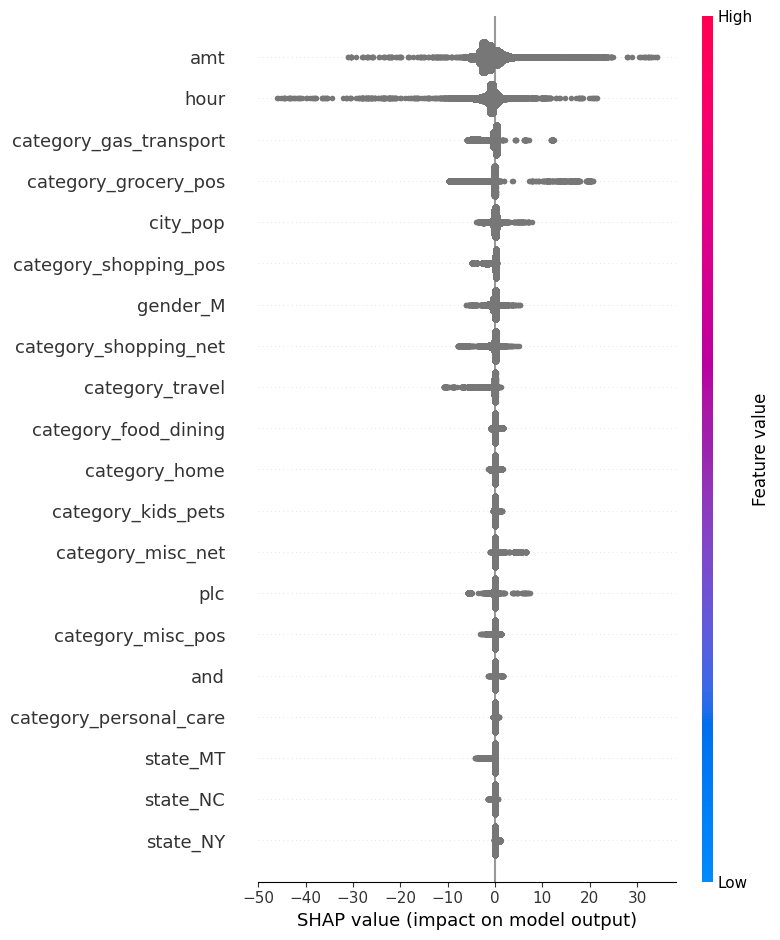

cluster
2    604041
0    399143
1     34156
Name: count, dtype: int64


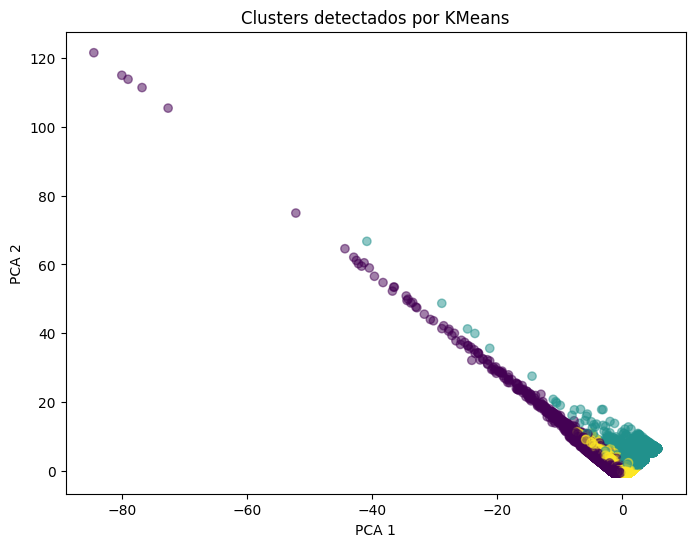

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from scipy.sparse import hstack
import xgboost as xgb
import shap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Cargar dataset completo
df = pd.read_csv("credit_card_transactions.csv")

# 2. Eliminar columnas innecesarias
cols_to_drop = ['Unnamed: 0', 'trans_num', 'first', 'last', 'street', 'zip', 'dob', 'unix_time', 'merch_zipcode']
df = df.drop(columns=cols_to_drop)

# 3. Convertir fecha a hora del día
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['hour'] = df['trans_date_trans_time'].dt.hour
df = df.drop(columns=['trans_date_trans_time'])  # ya no la necesitamos

# 4. Convertir categorías a tipo 'category'
cat_cols = ['gender', 'state', 'category']
for col in cat_cols:
    df[col] = df[col].astype('category')

# 5. Tomar una muestra del 80% para evitar MemoryError
df_sample = df.sample(frac=0.8, random_state=42)

# 6. Crear TF-IDF de la columna 'merchant'
tfidf = TfidfVectorizer(max_features=500)
X_text = tfidf.fit_transform(df_sample['merchant'].astype(str))

# 7. Escalar columnas numéricas
num_cols = ['amt', 'city_pop', 'hour']
scaler = StandardScaler()
X_num = scaler.fit_transform(df_sample[num_cols])

# 8. Convertir columnas categóricas a dummies y agregar
X_cat = pd.get_dummies(df_sample[cat_cols], drop_first=True)

# 9. Combinar todo
from scipy import sparse

X_cat_sparse = sparse.csr_matrix(X_cat.values)  # convertir dummies a sparse
X_final = hstack([X_text, X_num, X_cat_sparse])  # matriz final sparse

y = df_sample['is_fraud']

# 10. División train/test
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# --- Modelo Logistic Regression para comparar ---
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

# --- Modelo XGBoost ---
# XGBoost requiere matriz densa, vamos a convertir sparse a dense con cuidado (si es posible)
# Si el dataset es muy grande, usar DMatrix de xgboost que acepta sparse

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'verbosity': 0
}
bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred_xgb_prob = bst.predict(dtest)
y_pred_xgb = (y_pred_xgb_prob > 0.5).astype(int)

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

# --- Interpretabilidad con SHAP (para XGBoost) ---
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(dtest)

# Plot resumen global
shap.summary_plot(shap_values, features=X_test, feature_names=tfidf.get_feature_names_out().tolist() + num_cols + list(X_cat.columns))

# --- Clustering con KMeans ---
# Para clustering, usar solo variables numéricas y TF-IDF, no variables target

from sklearn.decomposition import TruncatedSVD

# Reducir dimensionalidad TF-IDF para clustering (e.g. a 20 componentes)
svd = TruncatedSVD(n_components=20, random_state=42)
X_text_reduced = svd.fit_transform(X_text)

# Combinar numéricas escaladas + reducidas de TF-IDF
import numpy as np
X_cluster = np.hstack([X_num, X_text_reduced])

# Aplicar KMeans para detectar 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# Agregar cluster al dataframe y ver distribución
df_sample['cluster'] = clusters
print(df_sample['cluster'].value_counts())

# Visualizar clusters con PCA 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Clusters detectados por KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predicciones Logistic Regression
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:,1]

# Predicciones XGBoost
y_pred_xgb = (bst.predict(dtest) > 0.5).astype(int)
y_prob_xgb = bst.predict(dtest)

# Crear diccionario con métricas para cada modelo
metrics_dict = {
    "Modelo": ["Logistic Regression", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC ROC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_xgb)
    ]
}

df_metrics = pd.DataFrame(metrics_dict)
print(df_metrics)


                Modelo  Accuracy  Precision    Recall  F1-score   AUC ROC
0  Logistic Regression  0.993985   0.000000  0.000000  0.000000  0.828932
1              XGBoost  0.997747   0.871685  0.699655  0.776253  0.975739


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Usar la probabilidad como predicción "continua"
y_prob_lr = model_lr.predict_proba(X_test)[:,1]
y_prob_xgb = bst.predict(dtest)

def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-9))) * 100

metrics_reg_dict = {
    "Modelo": ["Logistic Regression", "XGBoost"],
    "MAE": [
        mean_absolute_error(y_test, y_prob_lr),
        mean_absolute_error(y_test, y_prob_xgb)
    ],
    "MSE": [
        mean_squared_error(y_test, y_prob_lr),
        mean_squared_error(y_test, y_prob_xgb)
    ],
    "RMSE": [
        mean_squared_error(y_test, y_prob_lr, squared=False),
        mean_squared_error(y_test, y_prob_xgb, squared=False)
    ],
    "R2": [
        r2_score(y_test, y_prob_lr),
        r2_score(y_test, y_prob_xgb)
    ],
    "RMSLE": [
        rmsle(y_test, y_prob_lr),
        rmsle(y_test, y_prob_xgb)
    ],
    "MAPE (%)": [
        mape(y_test, y_prob_lr),
        mape(y_test, y_prob_xgb)
    ]
}

df_reg_metrics = pd.DataFrame(metrics_reg_dict)
print(df_reg_metrics)


                Modelo       MAE       MSE      RMSE        R2     RMSLE  \
0  Logistic Regression  0.010469  0.005169  0.071894  0.069305  0.049330   
1              XGBoost  0.003492  0.001911  0.043718  0.655850  0.030563   

       MAPE (%)  
0  5.361422e+08  
1  1.808767e+08  


c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Modelo Logistic Regression ---
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:,1]

# --- Modelo Random Forest ---
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:,1]

# --- Modelo Gradient Boosting ---
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)
y_prob_gb = model_gb.predict_proba(X_test)[:,1]

# --- Modelo XGBoost ---
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'use_label_encoder': False,
    'verbosity': 0
}
bst = xgb.train(params, dtrain, num_boost_round=100)
y_pred_xgb = (bst.predict(dtest) > 0.5).astype(int)
y_prob_xgb = bst.predict(dtest)

# Crear tabla resumen de métricas de clasificación
metrics_dict = {
    "Modelo": ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_xgb)
    ],
    "AUC ROC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb),
        roc_auc_score(y_test, y_prob_xgb)
    ]
}

df_metrics = pd.DataFrame(metrics_dict)
print(df_metrics)


                Modelo  Accuracy  Precision    Recall  F1-score   AUC ROC
0  Logistic Regression  0.993985   0.000000  0.000000  0.000000  0.828932
1        Random Forest  0.997747   0.938292  0.638665  0.760014  0.977837
2    Gradient Boosting  0.995652   0.804107  0.292865  0.429355  0.601507
3              XGBoost  0.997747   0.871685  0.699655  0.776253  0.975739


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def rmsle(y_true, y_pred):
    # Añadir un pequeño valor para evitar log(0)
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Calcular métricas usando las probabilidades
metrics_reg_dict = {
    "Modelo": ["Logistic Regression", "Random Forest", "Gradient Boosting", "XGBoost"],
    "MAE": [
        mean_absolute_error(y_test, y_prob_lr),
        mean_absolute_error(y_test, y_prob_rf),
        mean_absolute_error(y_test, y_prob_gb),
        mean_absolute_error(y_test, y_prob_xgb)
    ],
    "MSE": [
        mean_squared_error(y_test, y_prob_lr),
        mean_squared_error(y_test, y_prob_rf),
        mean_squared_error(y_test, y_prob_gb),
        mean_squared_error(y_test, y_prob_xgb)
    ],
    "RMSE": [
        mean_squared_error(y_test, y_prob_lr, squared=False),
        mean_squared_error(y_test, y_prob_rf, squared=False),
        mean_squared_error(y_test, y_prob_gb, squared=False),
        mean_squared_error(y_test, y_prob_xgb, squared=False)
    ],
    "R²": [
        r2_score(y_test, y_prob_lr),
        r2_score(y_test, y_prob_rf),
        r2_score(y_test, y_prob_gb),
        r2_score(y_test, y_prob_xgb)
    ],
    "RMSLE": [
        rmsle(y_test, y_prob_lr),
        rmsle(y_test, y_prob_rf),
        rmsle(y_test, y_prob_gb),
        rmsle(y_test, y_prob_xgb)
    ]
}

df_reg_metrics = pd.DataFrame(metrics_reg_dict)
print(df_reg_metrics)


                Modelo       MAE       MSE      RMSE        R²     RMSLE
0  Logistic Regression  0.010469  0.005169  0.071894  0.069305  0.049330
1        Random Forest  0.004823  0.001948  0.044134  0.649267  0.030376
2    Gradient Boosting  0.005921  0.004040  0.063560  0.272566  0.044018
3              XGBoost  0.003492  0.001911  0.043718  0.655850  0.030563


c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\billy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarnin

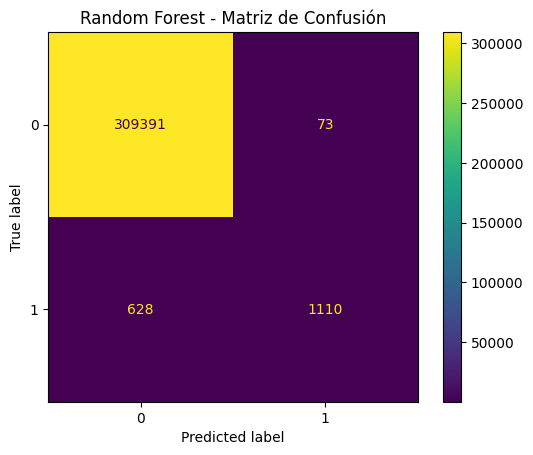

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest - Matriz de Confusión")
plt.show()


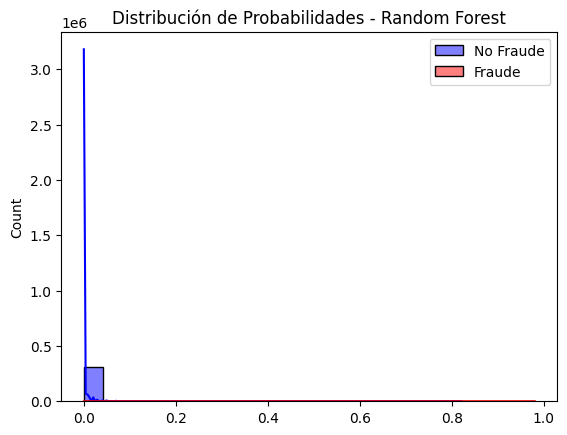

In [17]:
import seaborn as sns

sns.histplot(y_prob_rf[y_test==0], label='No Fraude', kde=True, color='blue')
sns.histplot(y_prob_rf[y_test==1], label='Fraude', kde=True, color='red')
plt.title("Distribución de Probabilidades - Random Forest")
plt.legend()
plt.show()


In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, title="Curva de Aprendizaje", cv=5, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Entrenamiento", color="blue")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Validación", color="green")
    plt.title(title)
    plt.xlabel("Tamaño del conjunto de entrenamiento")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. Leer datos
df = pd.read_csv("credit_card_transactions.csv")

# 2. Preprocesamiento
df = df.dropna(subset=['category', 'is_fraud', 'amt', 'city_pop'])  # asegurar que tenemos las numéricas
df['category'] = df['category'].astype(str)

# Verificar distribución original
print("Distribución original:", Counter(df['is_fraud']))

# 3. Preparar características
numeric_features = ['amt', 'city_pop']  # columnas numéricas relevantes
text_feature = 'category'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('text', TfidfVectorizer(max_features=100), text_feature)
    ])

X = preprocessor.fit_transform(df)
y = df['is_fraud']

# 4. Undersampling (opcional, probar también sin esto)
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print("Distribución después de undersampling:", Counter(y_res))

# 5. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42)

# 6. Modelos con parámetros básicos
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# 7. Entrenamiento y evaluación
resultados = []

for nombre, modelo in modelos.items():
    print(f"\nEntrenando {nombre}...")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-score": f1_score(y_test, y_pred, zero_division=0),
        "AUC ROC": roc_auc_score(y_test, y_prob) if len(set(y_test)) > 1 else 0.5
    })

# 8. Mostrar resultados
df_resultados = pd.DataFrame(resultados)
print("\nResultados:")
print(df_resultados)

# 9. Ver importancia de características para Random Forest (ejemplo)
if "Random Forest" in modelos:
    importancias = modelos["Random Forest"].feature_importances_
    print("\nImportancia de características (Random Forest):")
    print(importancias)

Distribución original: Counter({0: 1289169, 1: 7506})
Distribución después de undersampling: Counter({0: 7506, 1: 7506})

Entrenando Logistic Regression...

Entrenando Random Forest...

Entrenando Gradient Boosting...

Entrenando XGBoost...

Resultados:
                Modelo  Accuracy  Precision    Recall  F1-score   AUC ROC
0  Logistic Regression  0.828153   0.894211  0.747799  0.814477  0.904677
1        Random Forest  0.962922   0.956220  0.970951  0.963529  0.992422
2    Gradient Boosting  0.956927   0.955702  0.959067  0.957381  0.991442
3              XGBoost  0.965586   0.957631  0.974912  0.966194  0.994789

Importancia de características (Random Forest):
[0.75987953 0.05762012 0.00794898 0.01394016 0.02796464 0.0085516
 0.01797531 0.00533096 0.01374767 0.00696455 0.01354601 0.00832114
 0.00564891 0.03035617 0.01056106 0.01164317]
